In [34]:
# Install the required packages
! pip install pandas matplotlib numpy

# Suppress depreciation warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Import the required modules
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import helper_functions

### Read in tree level data from forest treefile generated using treeinfo

In [35]:
tree_info_df = helper_functions.treeinfo_attributes_tree('../data/Mak1_clipped_raycloud_inside_trees_info.txt')
tree_info_df

,tree_id,height,crown_radius,dimension,monocotal,DBH,bend,branch_slope
0,1,13.0426,2.0305,1.1887,0.5774,0.1404,0.0051,0.9393
1,2,17.1850,4.4902,1.7716,0.2220,0.1480,0.0037,0.7133
2,3,19.0333,3.5993,1.6562,0.2217,0.1652,0.0050,0.4639
3,4,16.8033,3.0701,1.5649,0.4213,0.1436,0.0052,0.4348
4,5,17.2500,3.0166,1.5786,0.4421,0.1280,0.0037,0.4231
...,...,...,...,...,...,...,...,...
94,95,16.2340,3.7741,1.6478,0.3453,0.1634,0.0050,0.6723
95,96,17.4833,4.1620,1.7885,0.2858,0.1336,0.0045,0.8003
96,97,15.4950,3.0141,1.8092,0.3936,0.1220,0.0034,0.9735
97,98,19.9194,3.2966,1.5325,0.2042,0.1676,0.0079,0.5484


### Read tree level locations from treefile generated from rayextract trees

In [36]:
tree_df = helper_functions.attributes_tree('../data/Mak1_clipped_raycloud_inside_trees.txt')
tree_df

,tree_id,x,y,z,radius,parent_id,section_id
0,1,-15.6104,4.3112,1.6299,0.0713,-1.0,0.0
115,2,-14.4935,13.7130,1.2100,0.0740,-1.0,1.0
1384,3,-14.3482,9.2736,1.5300,0.0826,-1.0,2.0
2462,4,-13.6061,2.8842,1.8400,0.0718,-1.0,3.0
2983,5,-14.0634,20.2596,0.9700,0.0640,-1.0,4.0
...,...,...,...,...,...,...,...
68434,95,19.9154,5.0651,1.9500,0.0827,-1.0,94.0
69134,96,19.1359,12.3991,1.6400,0.0668,-1.0,95.0
70301,97,20.1713,16.5324,1.3900,0.0610,-1.0,96.0
71044,98,21.4034,13.6195,1.5300,0.0838,-1.0,97.0


In [37]:
# Join the tree_info_df and tree_df dataframes on the 'tree_id' column
tree_merged_df = tree_info_df.merge(tree_df , on='tree_id')
tree_merged_df = tree_merged_df[['x', 'y', 'z','tree_id', 'DBH', 'crown_radius', 'height']]
tree_merged_df

,x,y,z,tree_id,DBH,crown_radius,height
0,-15.6104,4.3112,1.6299,1,0.1404,2.0305,13.0426
1,-14.4935,13.7130,1.2100,2,0.1480,4.4902,17.1850
2,-14.3482,9.2736,1.5300,3,0.1652,3.5993,19.0333
3,-13.6061,2.8842,1.8400,4,0.1436,3.0701,16.8033
4,-14.0634,20.2596,0.9700,5,0.1280,3.0166,17.2500
...,...,...,...,...,...,...,...
94,19.9154,5.0651,1.9500,95,0.1634,3.7741,16.2340
95,19.1359,12.3991,1.6400,96,0.1336,4.1620,17.4833
96,20.1713,16.5324,1.3900,97,0.1220,3.0141,15.4950
97,21.4034,13.6195,1.5300,98,0.1676,3.2966,19.9194


In [38]:
branch_segments_df = helper_functions.treeinfo_attributes_segment('../data/Mak1_clipped_raycloud_inside_trees_info.txt')
branch_segments_df

,tree_id,x,y,z,radius,parent_id,section_id,volume,diameter,length,strength,min_strength,dominance,angle,children,branch,branch_order,extension,pos_in_branch,segment_length
1,1,-15.7655,4.3449,2.1161,0.0702,0.0,99.0,0.0079,0.1404,13.5328,0.0169,0.0169,0.0,0.0,1.0,0.0,2.0,1.0,0.5115,0.0
2,1,-15.5967,4.2829,2.3560,0.0702,1.0,198.0,0.0046,0.1404,13.0214,0.0176,0.0169,0.0,0.0,1.0,0.0,3.0,2.0,0.2998,0.0
3,1,-15.6246,4.3006,2.7519,0.0702,2.0,314.0,0.0062,0.1404,12.7216,0.0180,0.0169,0.0,0.0,1.0,0.0,4.0,3.0,0.3973,0.0
4,1,-15.6376,4.2810,3.1270,0.0702,3.0,422.0,0.0058,0.1404,12.3243,0.0186,0.0169,0.0,0.0,1.0,0.0,5.0,4.0,0.3758,0.0
5,1,-15.6456,4.2841,3.4690,0.0702,4.0,530.0,0.0053,0.1404,11.9485,0.0192,0.0169,0.0,0.0,1.0,0.0,6.0,5.0,0.3421,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72156,99,4.4300,10.9925,12.2700,0.0030,325.0,53488.0,0.0000,0.0060,1.0623,0.0203,0.0166,0.0,0.0,0.0,1.0,0.0,26.0,0.0623,0.0
72157,99,3.8700,10.6750,12.4600,0.0023,326.0,54513.0,0.0000,0.0046,1.0929,0.0162,0.0152,0.0,0.0,1.0,1.0,331.0,27.0,0.0284,0.0
72158,99,3.7700,10.7750,12.4250,0.0021,327.0,55505.0,0.0000,0.0042,1.0443,0.0158,0.0154,0.0,0.0,0.0,2.0,0.0,4.0,0.0443,0.0
72159,99,3.8433,10.6567,12.4800,0.0023,329.0,55506.0,0.0000,0.0046,1.0644,0.0166,0.0152,0.0,0.0,1.0,1.0,332.0,28.0,0.0380,0.0


In [39]:
# Group by 'tree_id' and calculate the sum of 'volume' for each group
total_volume_per_tree = branch_segments_df.groupby('tree_id')['volume'].sum()
total_volume_per_tree

tree_id
1     0.1551
2     0.2123
3     0.2827
4     0.1883
5     0.1599
       ...  
95    0.2338
96    0.1812
97    0.1290
98    0.3206
99    0.1125
Name: volume, Length: 99, dtype: float64

In [40]:
# import pandas as pd
# import numpy as np
# from scipy.optimize import curve_fit
# import matplotlib.pyplot as plt

# df = branch_segments_df[branch_segments_df['tree_id'] == 2]

# # Define the model function
# def model(order, a, b):
#     return a * np.exp(-b * order)

# # Fit the model
# popt, pcov = curve_fit(model, df['branch_order'], df['radius'])

# # Plotting the results
# plt.scatter(df['branch_order'], df['radius'], label='Data')
# plt.plot(df['branch_order'], model(df['branch_order'], *popt), label='Fit: a=%.2f, b=%.2f' % tuple(popt), color='red')
# plt.xlabel('Branch Order')
# plt.ylabel('Branch Radius')
# plt.legend()
# plt.show()

### Join dataframes and filter to what is needed.

In [41]:
# Join the tree_info_df and tree_df dataframes on the 'tree_id' column
merged_df_final = tree_merged_df.merge(total_volume_per_tree , on='tree_id')
# merged_df_final = tree_merged_df_final[['x', 'y', 'z','tree_id', 'DBH', 'crown_radius', 'height', 'total_volume']]
merged_df_final

,x,y,z,tree_id,DBH,crown_radius,height,volume
0,-15.6104,4.3112,1.6299,1,0.1404,2.0305,13.0426,0.1551
1,-14.4935,13.7130,1.2100,2,0.1480,4.4902,17.1850,0.2123
2,-14.3482,9.2736,1.5300,3,0.1652,3.5993,19.0333,0.2827
3,-13.6061,2.8842,1.8400,4,0.1436,3.0701,16.8033,0.1883
4,-14.0634,20.2596,0.9700,5,0.1280,3.0166,17.2500,0.1599
...,...,...,...,...,...,...,...,...
94,19.9154,5.0651,1.9500,95,0.1634,3.7741,16.2340,0.2338
95,19.1359,12.3991,1.6400,96,0.1336,4.1620,17.4833,0.1812
96,20.1713,16.5324,1.3900,97,0.1220,3.0141,15.4950,0.1290
97,21.4034,13.6195,1.5300,98,0.1676,3.2966,19.9194,0.3206


In [43]:
# save to csv
tree_merged_df.to_csv('../data/rct_trees.csv', index=False)

Now we can visualise the tree IDs by loading the saved CSV using CloudComapre. 

### Plot tree locations and stem area from RCT

In [44]:
inventory_df = pd.read_csv('../data/inventory_data.csv')
# Filter to only include the data for Mak1
inventory_df = inventory_df[inventory_df['plot_id'] == 'Mak1']
inventory_df

,plot_id,utm_zone,easting,northing,avg_easting,avg_northing,tree_number,forest_stand,bearing,distance,...,species _name,species_scientific_name,dbh,quality_class,crown_class,height,height_crown,base_tree_ht,base_crown_ht,remarks
0,Mak1,45,305028,3030843,305029,3030844,1,1,9,17.9,...,Sal,Shorea robusta,15.2,1,2,16.60,11.5,NaN,NaN,NaN
1,Mak1,45,305028,3030843,305029,3030844,2,1,10,15.4,...,Sal,Shorea robusta,14.0,1,2,12.60,5.8,NaN,NaN,NaN
2,Mak1,45,305028,3030843,305029,3030844,3,1,12,6.7,...,Sal,Shorea robusta,16.5,1,1,18.30,7.5,NaN,NaN,NaN
3,Mak1,45,305028,3030843,305029,3030844,4,1,19,18.0,...,Sal,Shorea robusta,21.0,1,1,18.90,9.9,NaN,NaN,NaN
4,Mak1,45,305028,3030843,305029,3030844,5,1,21,4.7,...,Sal,Shorea robusta,10.7,1,2,11.90,5.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,Mak1,45,305028,3030843,305029,3030844,93,1,344,20.0,...,Sal,Shorea robusta,9.4,1,3,10.40,8.2,NaN,NaN,NaN
93,Mak1,45,305028,3030843,305029,3030844,94,1,346,13.7,...,Sal,Shorea robusta,12.2,1,3,13.00,6.6,NaN,NaN,NaN
94,Mak1,45,305028,3030843,305029,3030844,95,1,349,5.0,...,Sal,Shorea robusta,11.1,1,3,13.40,7.6,NaN,NaN,NaN
95,Mak1,45,305028,3030843,305029,3030844,96,1,355,16.7,...,Sal,Shorea robusta,11.4,1,3,13.00,6.8,NaN,NaN,NaN


In [45]:
# Convert bearing and distance to Cartesian coordinates
inventory_df['x'] = inventory_df['distance'] * np.sin(np.radians(inventory_df['bearing']))
inventory_df['y'] = inventory_df['distance'] * np.cos(np.radians(inventory_df['bearing']))
inventory_df

,plot_id,utm_zone,easting,northing,avg_easting,avg_northing,tree_number,forest_stand,bearing,distance,...,dbh,quality_class,crown_class,height,height_crown,base_tree_ht,base_crown_ht,remarks,x,y
0,Mak1,45,305028,3030843,305029,3030844,1,1,9,17.9,...,15.2,1,2,16.60,11.5,NaN,NaN,NaN,2.800177,17.679621
1,Mak1,45,305028,3030843,305029,3030844,2,1,10,15.4,...,14.0,1,2,12.60,5.8,NaN,NaN,NaN,2.674182,15.166039
2,Mak1,45,305028,3030843,305029,3030844,3,1,12,6.7,...,16.5,1,1,18.30,7.5,NaN,NaN,NaN,1.393008,6.553589
3,Mak1,45,305028,3030843,305029,3030844,4,1,19,18.0,...,21.0,1,1,18.90,9.9,NaN,NaN,NaN,5.860227,17.019334
4,Mak1,45,305028,3030843,305029,3030844,5,1,21,4.7,...,10.7,1,2,11.90,5.0,NaN,NaN,NaN,1.684329,4.387828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,Mak1,45,305028,3030843,305029,3030844,93,1,344,20.0,...,9.4,1,3,10.40,8.2,NaN,NaN,NaN,-5.512747,19.225234
93,Mak1,45,305028,3030843,305029,3030844,94,1,346,13.7,...,12.2,1,3,13.00,6.6,NaN,NaN,NaN,-3.314330,13.293051
94,Mak1,45,305028,3030843,305029,3030844,95,1,349,5.0,...,11.1,1,3,13.40,7.6,NaN,NaN,NaN,-0.954045,4.908136
95,Mak1,45,305028,3030843,305029,3030844,96,1,355,16.7,...,11.4,1,3,13.00,6.8,NaN,NaN,NaN,-1.455501,16.636451


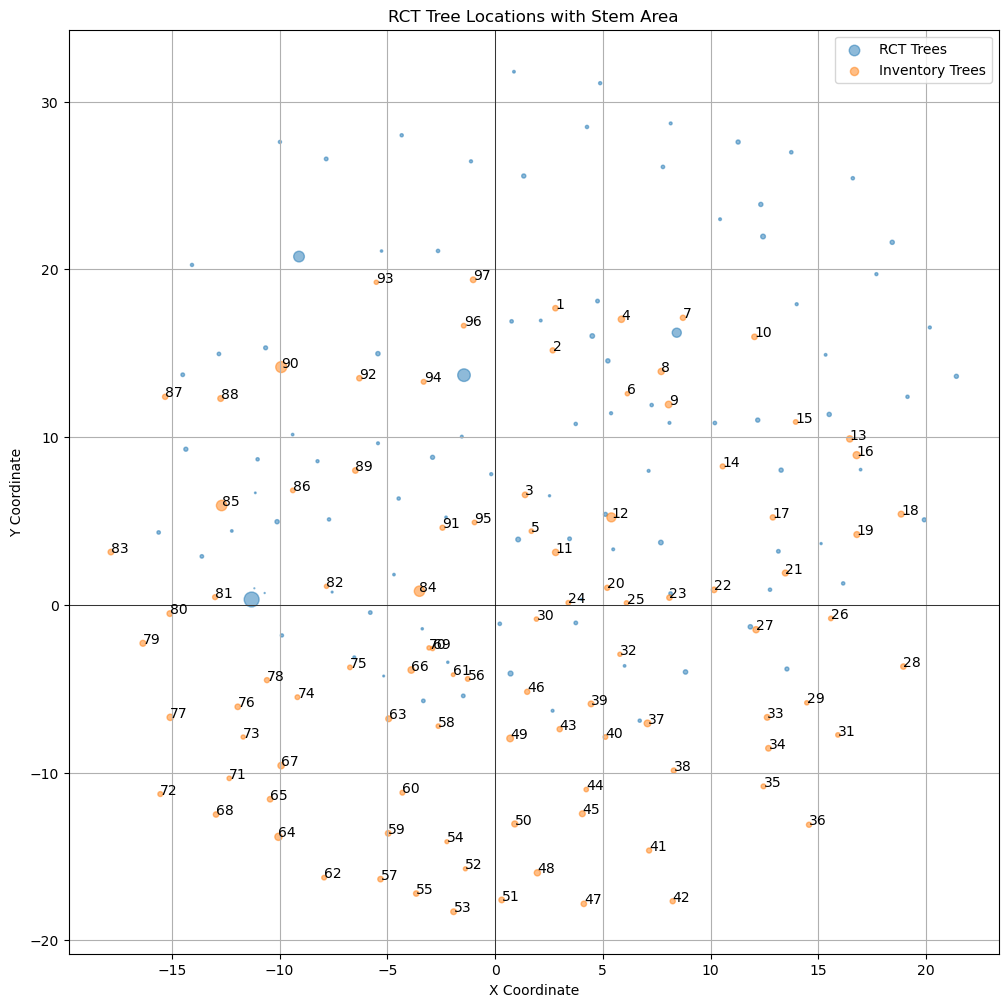

In [46]:
# Calculate stem area
tree_merged_df['stem_area'] = np.pi * (tree_merged_df['DBH'] ** 2) * 100

# Plot the RCT tree locations along with inventory data
plt.figure(figsize=(12, 12))

# Scatter plot for tree_merged_df
plt.scatter(tree_merged_df['x'], tree_merged_df['y'], s=tree_merged_df['stem_area'], alpha=0.5, label='RCT Trees')

# Scatter plot for inventory_df
plt.scatter(inventory_df['x'], inventory_df['y'], s=inventory_df['dbh'], alpha=0.5, label='Inventory Trees')

# Adding tree ID labels for inventory_df points
for i in range(inventory_df.shape[0]):
    plt.text(inventory_df['x'][i], inventory_df['y'][i], f"{inventory_df['tree_number'][i]}")

# Adding labels and grid
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('RCT Tree Locations with Stem Area')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()
plt.show()


In [ ]:
# import numpy as np
# import open3d as o3d
# import pandas as pd

# # Convert dataframes to numpy arrays of points
# source_points = tree_merged_df[['x', 'y']].to_numpy()
# target_points = inventory_df[['x', 'y']].to_numpy()

# # Ensure points are in the correct shape (Nx3) for Open3D by adding a z dimension of 0
# source_points = np.hstack((source_points, np.zeros((source_points.shape[0], 1))))
# target_points = np.hstack((target_points, np.zeros((target_points.shape[0], 1))))

# # Convert numpy arrays to open3d point clouds
# source_pcd = o3d.geometry.PointCloud()
# source_pcd.points = o3d.utility.Vector3dVector(source_points)

# target_pcd = o3d.geometry.PointCloud()
# target_pcd.points = o3d.utility.Vector3dVector(target_points)

# # Perform ICP
# threshold = 10.0  # Distance threshold, can be adjusted
# trans_init = np.eye(4)  # Initial transformation

# icp_result = o3d.pipelines.registration.registration_icp(
#     source_pcd, target_pcd, threshold, trans_init,
#     o3d.pipelines.registration.TransformationEstimationPointToPoint()
# )

# # Extract translation component
# translation = icp_result.transformation[:2, 3]
# print("Translation:", translation)

# # Apply translation to tree_merged_df
# tree_merged_df['x_translated'] = tree_merged_df['x'] + translation[0]
# tree_merged_df['y_translated'] = tree_merged_df['y'] + translation[1]

# # Display the updated DataFrame
# tree_merged_df

In [47]:
# Calculate stem area
tree_merged_df['stem_area'] = np.pi * (tree_merged_df['DBH'] ** 2) * 100

# Plot the RCT tree locations along with inventory data
plt.figure(figsize=(12, 12))

# Scatter plot for tree_merged_df
plt.scatter(tree_merged_df['x_translated'], tree_merged_df['y_translated'], s=tree_merged_df['stem_area'], alpha=0.5, label='RCT Trees')

# Scatter plot for inventory_df
plt.scatter(inventory_df['x'], inventory_df['y'], s=inventory_df['dbh'], alpha=0.5, label='Inventory Trees')

# Adding tree ID labels for inventory_df points
for i in range(inventory_df.shape[0]):
    plt.text(inventory_df['x'][i], inventory_df['y'][i], f"{inventory_df['tree_number'][i]}")

# Adding labels and grid
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('RCT Tree Locations with Stem Area')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()
plt.show()

KeyError: 'x_translated'

<Figure size 1200x1200 with 0 Axes>

### Load updated tree locations from CloudComapre

In [ ]:
translated_tree_merged_df = pd.read_csv('../data/raycloud_trees_translated.txt', delimiter=' ')
translated_tree_merged_df

In [ ]:
# Calculate stem area
translated_tree_merged_df['stem_area'] = np.pi * (translated_tree_merged_df['DBH'] ** 2) * 100

# Plot the RCT tree locations along with inventory data
plt.figure(figsize=(12, 12))

# Scatter plot for tree_merged_df
plt.scatter(translated_tree_merged_df['X'], translated_tree_merged_df['Y'], s=translated_tree_merged_df['stem_area'], alpha=0.5, label='RCT Trees')

# Scatter plot for inventory_df
plt.scatter(inventory_df['x'], inventory_df['y'], s=inventory_df['dbh'], alpha=0.5, label='Inventory Trees')

# Adding tree ID labels for inventory_df points
for i in range(inventory_df.shape[0]):
    plt.text(inventory_df['x'][i], inventory_df['y'][i], f"{inventory_df['tree_number'][i]}")

# Adding labels and grid
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('RCT Tree Locations with Stem Area')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()
plt.show()

In [ ]:
import geopandas as gpd
from shapely.geometry import Point

# Create GeoDataFrames
translated_tree_merged_gdf = gpd.GeoDataFrame(
    translated_tree_merged_df, 
    geometry=[Point(xy) for xy in zip(translated_tree_merged_df['X'], translated_tree_merged_df['Y'])],
    crs="EPSG:4326"
)

inventory_gdf = gpd.GeoDataFrame(
    inventory_df, 
    geometry=[Point(xy) for xy in zip(inventory_df['x'], inventory_df['y'])],
    crs="EPSG:4326"
)

# Perform spatial join
joined_gdf = gpd.sjoin_nearest(translated_tree_merged_gdf, inventory_gdf, how="inner", distance_col="distance")

# Display the result
joined_gdf

#save to csv
joined_gdf.to_csv('../data/joined_trees.csv', index=False)


In [ ]:
# Calculate stem area
joined_gdf['stem_area'] = np.pi * (joined_gdf['DBH'] ** 2) * 100

# Plot the RCT tree locations along with inventory data
plt.figure(figsize=(12, 12))

# Scatter plot for tree_merged_df
plt.scatter(joined_gdf['X'], joined_gdf['Y'], s=joined_gdf['stem_area'], alpha=0.5, label='RCT Trees')

# Scatter plot for inventory_df
# plt.scatter(inventory_df['x'], inventory_df['y'], s=inventory_df['dbh'], alpha=0.5, label='Inventory Trees')

# # Adding tree ID labels for inventory_df points
# for i in range(inventory_df.shape[0]):
#     plt.text(inventory_df['x'][i], inventory_df['y'][i], f"{inventory_df['tree_number'][i]}")

# Adding tree ID labels for inventory_df points
for i in range(joined_gdf.shape[0]):
    plt.text(joined_gdf['X'][i], joined_gdf['Y'][i], f"{int(joined_gdf['tree_id'][i])}")


# Adding labels and grid
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('RCT Tree Locations with Stem Area')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()
plt.show()